In [6]:
import io, os, sys, types
from IPython import get_ipython
from Utils import NotebookFinder
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
#import Test_model
from Test_model import evaluation
import Train_model 
import matplotlib.pyplot as plt
import model


In [7]:
width = 0.3

In [9]:
def run_main():
    datasets = pd.read_csv("data2/data_total3.csv") 
    features = datasets.iloc[:,:-1]
    labels =  datasets.iloc[:,-1]
    skf = StratifiedKFold(n_splits=5)
    Test_accuracy_Epo = []
    Accuracy_value_Epo = []
    Accuracy_value_all = []
    Loss_value_all = []
    AccofB_test = []
    AccofA_test = []
    classes = ["BENIGN","ATTACK"]
    epoch = 0
    for train_index, test_index in skf.split(features, labels):  
        features_train = features.iloc[train_index]
        features_test =  features.iloc[test_index]
        labels_train = labels.iloc[train_index]
        labels_test =  labels.iloc[test_index]
        features_train = features_train.values
        labels_train = labels_train.values
        features_test = features_test.values
        labels_test = labels_test.values
        labels_train = labels_train.reshape(len(labels_train))
        labels_test = labels_test.reshape(len(labels_test))
        print(labels_train.shape)
        print(labels_test.shape)
        Accuracy_value,acc,Loss_value,Epoch_accracy = Train_model.train(features_train,labels_train)
        Accuracy_value_Epo.append(Epoch_accracy)
        Accuracy_value_all.extend(Accuracy_value)
        Loss_value_all.extend(Loss_value)
        print("Epoch_accracy:",Epoch_accracy)
        print("Accuracy_value_Epo",Accuracy_value_Epo)
        plt.figure(figsize=(20, 10))
        plt.plot(range(Train_model.Iteration*(epoch+1)), Accuracy_value_all)
        plt.xlabel('training step')
        plt.ylabel('accuracy value')
        plt.title('the accuracy value of training data')
       # plt.savefig('model_folder/results/accuracy.png')
        plt.show()

        plt.figure()
        plt.plot(range(Train_model.Iteration*(epoch+1)), Loss_value_all)
        plt.xlabel('training value')
        plt.ylabel('loss value')
        plt.title('the value of the loss function of the training data')
       # plt.savefig('model_folder/results/loss.png')
        plt.show()

        plt.figure()
        plt.plot(range(epoch+1),Accuracy_value_Epo)
        plt.xlabel('Epoch')
        plt.ylabel('accracy')
        plt.title('Epoch average accuracy')
       # plt.savefig('model_folder/results/Epoch_accuracy.png')
        plt.show()

        plt.figure()
        plt.plot(classes, acc)
        plt.ylabel('accuracy')
        plt.xlabel('classification')
        plt.title('Accuracy of each classification')
        #plt.savefig('model_folder/results/Accuracy_of_each_classification.png')
        plt.show()

        precision,accBA =evaluation(features_test,labels_test)
        Test_accuracy_Epo.append(precision)
        AccofB_test.append(accBA[0])
        AccofA_test.append(accBA[1])
        plt.figure()
        plt.plot(range(epoch+1),Test_accuracy_Epo)
        plt.ylabel('Test_accuracy')
        plt.xlabel('Epoch')
        plt.title('Test_accuracy')
       # plt.savefig('model_folder/results/test_accuracy.png')
        plt.show()

        y = list(range(0,epoch+1))
        plt.bar(x=range(epoch+1), height = AccofB_test, width=width, label='BENIGN',color = 'steelblue',alpha = 0.8)  
        plt.bar(x=np.arange(epoch+1)+width,height = AccofA_test, width=width, label='Attack',color = 'indianred',alpha = 0.8)  
        plt.xticks(np.arange(len(y))+width/2, y)
        plt.ylabel('Test_accuracyofclasses')
        plt.xlabel('Epoch')
        plt.title('Test_accuracyofclasses')
        plt.legend()  
       # plt.savefig('model_folder/results/test_accuracyofclasses.png')
        plt.show() 
        epoch += 1
    average_train_accracy=model.Epoch_accuracy_mean(Epoch_accracy)
    print("average_train_accracy is:",average_train_accracy)
    average_test_accracy=model.Epoch_accuracy_mean(Test_accuracy_Epo)
    print("average_test_accracy is:",average_test_accracy)

(893231,)
(223309,)
index: 0  loss_value: 2.3608987  accuracy_value: 0.34375
index: 1000  loss_value: 1.2004375  accuracy_value: 0.9375
index: 2000  loss_value: 1.1407756  accuracy_value: 0.96875
index: 3000  loss_value: 1.1402041  accuracy_value: 0.953125
index: 4000  loss_value: 1.1472175  accuracy_value: 0.96875
index: 5000  loss_value: 1.0745426  accuracy_value: 1.0
index: 6000  loss_value: 1.1120694  accuracy_value: 0.953125
index: 7000  loss_value: 1.0554386  accuracy_value: 1.0
index: 8000  loss_value: 1.0552403  accuracy_value: 1.0
index: 9000  loss_value: 1.0867103  accuracy_value: 0.984375
index: 10000  loss_value: 1.0567145  accuracy_value: 1.0
index: 11000  loss_value: 1.0726712  accuracy_value: 0.984375
index: 12000  loss_value: 1.0453233  accuracy_value: 1.0
index: 13000  loss_value: 1.0477896  accuracy_value: 1.0
Accuracy of two classes： [0.9720066339433794, 0.9736496927444568]
Epoch_accracy: 0.9728257
Accuracy_value_Epo [0.9728257]


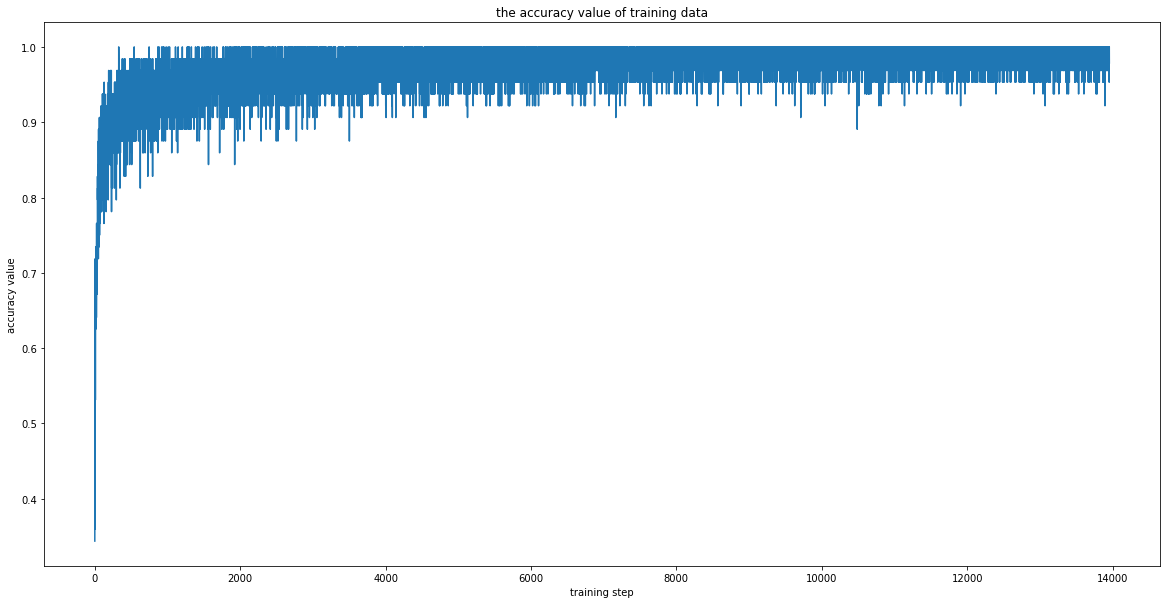

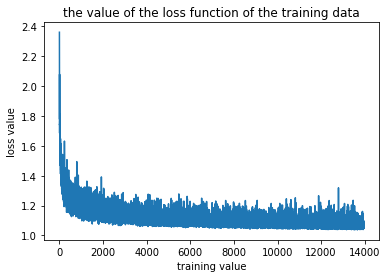

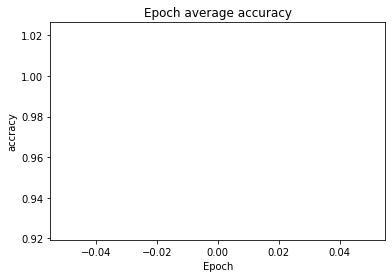

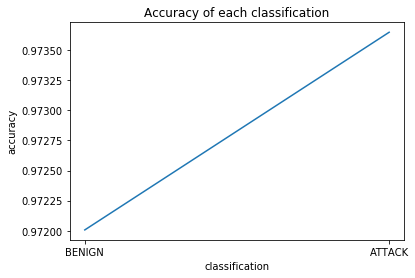

W1218 14:35:37.936842 140354176464704 queue_runner_impl.py:471] `tf.train.start_queue_runners()` was called when no queue runners were defined. You can safely remove the call to this deprecated function.


acc: [0.9882053571428572, 0.8025766110557098]
true_count 200013
223360
测试precision= 0.8954736747851003


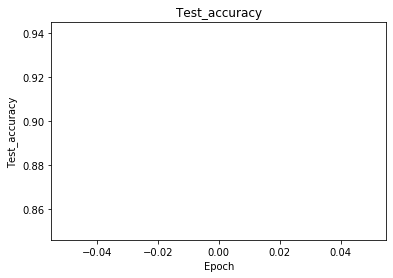

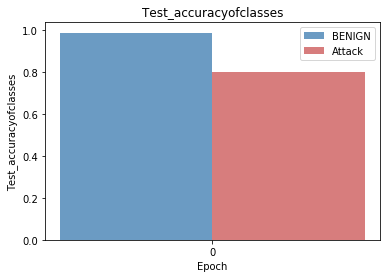

(893232,)
(223308,)
index: 0  loss_value: 2.0693727  accuracy_value: 0.40625
index: 1000  loss_value: 1.2468324  accuracy_value: 0.921875
index: 2000  loss_value: 1.1642392  accuracy_value: 0.953125
index: 3000  loss_value: 1.149622  accuracy_value: 0.953125
index: 4000  loss_value: 1.1504202  accuracy_value: 0.984375
index: 5000  loss_value: 1.0783398  accuracy_value: 0.984375
index: 6000  loss_value: 1.0763324  accuracy_value: 0.984375
index: 7000  loss_value: 1.0789754  accuracy_value: 1.0
index: 8000  loss_value: 1.1298131  accuracy_value: 0.953125
index: 9000  loss_value: 1.1191573  accuracy_value: 0.984375
index: 10000  loss_value: 1.1261269  accuracy_value: 0.96875
index: 11000  loss_value: 1.0597674  accuracy_value: 1.0
index: 12000  loss_value: 1.0617577  accuracy_value: 1.0
index: 13000  loss_value: 1.1215978  accuracy_value: 0.96875
Accuracy of two classes： [0.9724396706242648, 0.9751366138628539]
Epoch_accracy: 0.97378373
Accuracy_value_Epo [0.9728257, 0.97378373]


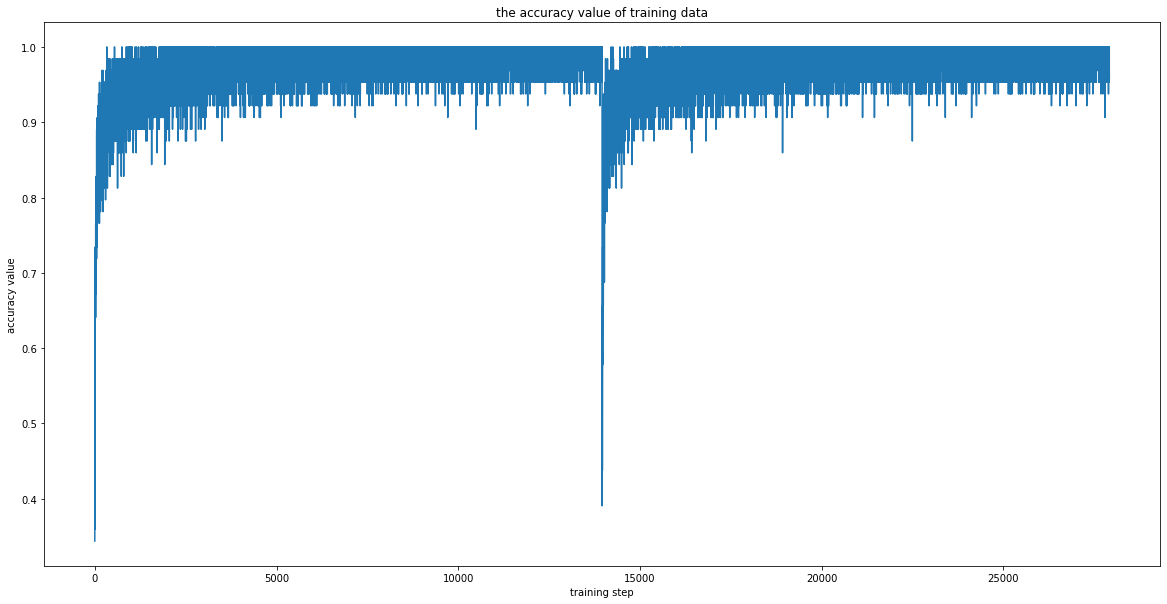

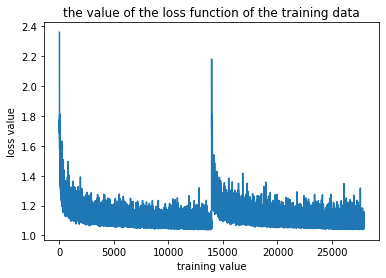

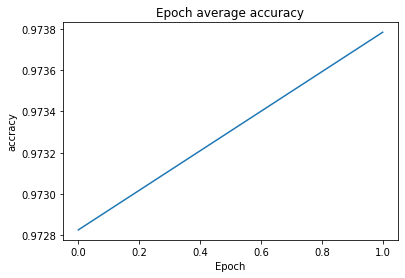

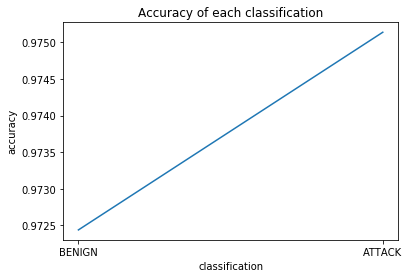

W1218 14:40:13.874276 140354176464704 queue_runner_impl.py:471] `tf.train.start_queue_runners()` was called when no queue runners were defined. You can safely remove the call to this deprecated function.


acc: [0.9852589285714286, 0.9048675746577065]
true_count 211068
223360
测试precision= 0.94496776504298


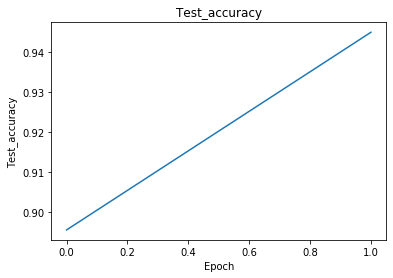

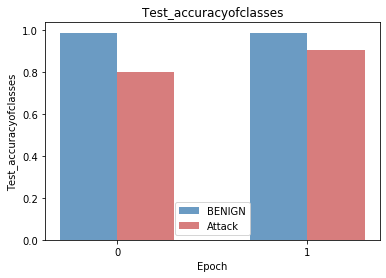

(893232,)
(223308,)
index: 0  loss_value: 1.9170771  accuracy_value: 0.5625
index: 1000  loss_value: 1.1925528  accuracy_value: 0.953125
index: 2000  loss_value: 1.1990036  accuracy_value: 0.953125
index: 3000  loss_value: 1.1201409  accuracy_value: 0.96875
index: 4000  loss_value: 1.1436697  accuracy_value: 0.96875
index: 5000  loss_value: 1.0870458  accuracy_value: 1.0
index: 6000  loss_value: 1.0759102  accuracy_value: 1.0
index: 7000  loss_value: 1.091068  accuracy_value: 0.984375
index: 8000  loss_value: 1.0826159  accuracy_value: 0.984375
index: 9000  loss_value: 1.0640498  accuracy_value: 1.0
index: 10000  loss_value: 1.0794033  accuracy_value: 0.984375
index: 11000  loss_value: 1.0653193  accuracy_value: 0.984375
index: 12000  loss_value: 1.0870633  accuracy_value: 0.984375
index: 13000  loss_value: 1.0658109  accuracy_value: 1.0
Accuracy of two classes： [0.9719731517257851, 0.9716283384205573]
Epoch_accracy: 0.97180176
Accuracy_value_Epo [0.9728257, 0.97378373, 0.97180176]


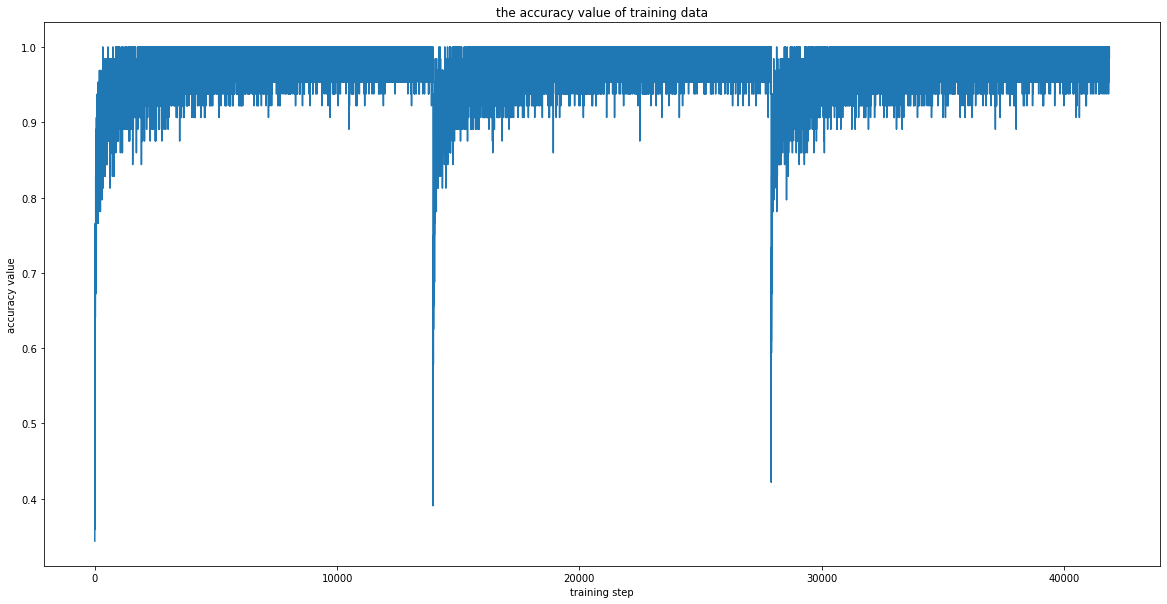

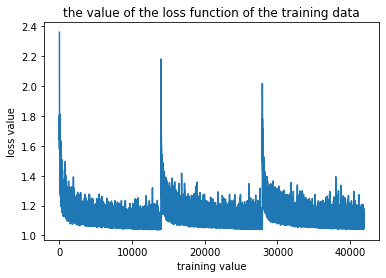

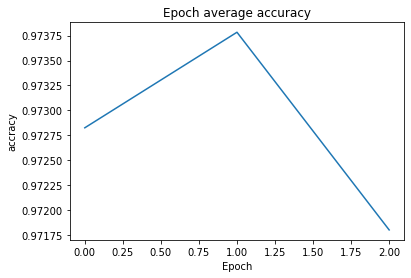

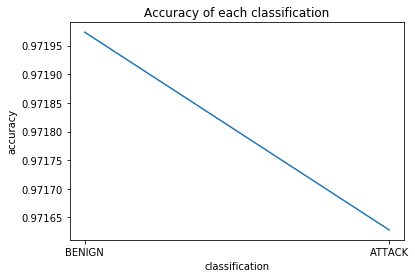

W1218 14:44:51.705808 140354176464704 queue_runner_impl.py:471] `tf.train.start_queue_runners()` was called when no queue runners were defined. You can safely remove the call to this deprecated function.


acc: [0.9848660714285714, 0.9996945412728645]
true_count 221579
223360
测试precision= 0.9920263252148998


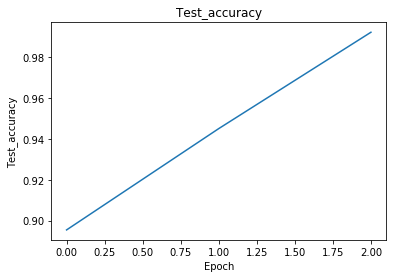

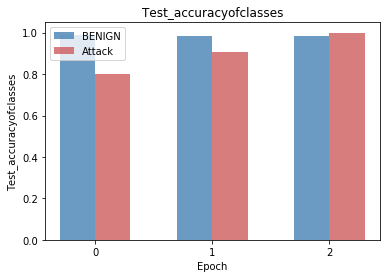

(893232,)
(223308,)
index: 0  loss_value: 2.4119182  accuracy_value: 0.46875
index: 1000  loss_value: 1.2198219  accuracy_value: 0.9375
index: 2000  loss_value: 1.1031361  accuracy_value: 0.984375
index: 3000  loss_value: 1.0824797  accuracy_value: 0.984375
index: 4000  loss_value: 1.1153514  accuracy_value: 0.96875
index: 5000  loss_value: 1.0953113  accuracy_value: 0.96875
index: 6000  loss_value: 1.076322  accuracy_value: 1.0
index: 7000  loss_value: 1.0788407  accuracy_value: 0.984375
index: 8000  loss_value: 1.1195066  accuracy_value: 0.984375
index: 9000  loss_value: 1.0607034  accuracy_value: 1.0
index: 10000  loss_value: 1.0686902  accuracy_value: 1.0
index: 11000  loss_value: 1.0988222  accuracy_value: 0.984375
index: 12000  loss_value: 1.115742  accuracy_value: 0.953125
index: 13000  loss_value: 1.1264172  accuracy_value: 0.96875
Accuracy of two classes： [0.9783079872946145, 0.9800508947000783]
Epoch_accracy: 0.9791764
Accuracy_value_Epo [0.9728257, 0.97378373, 0.97180176, 0.

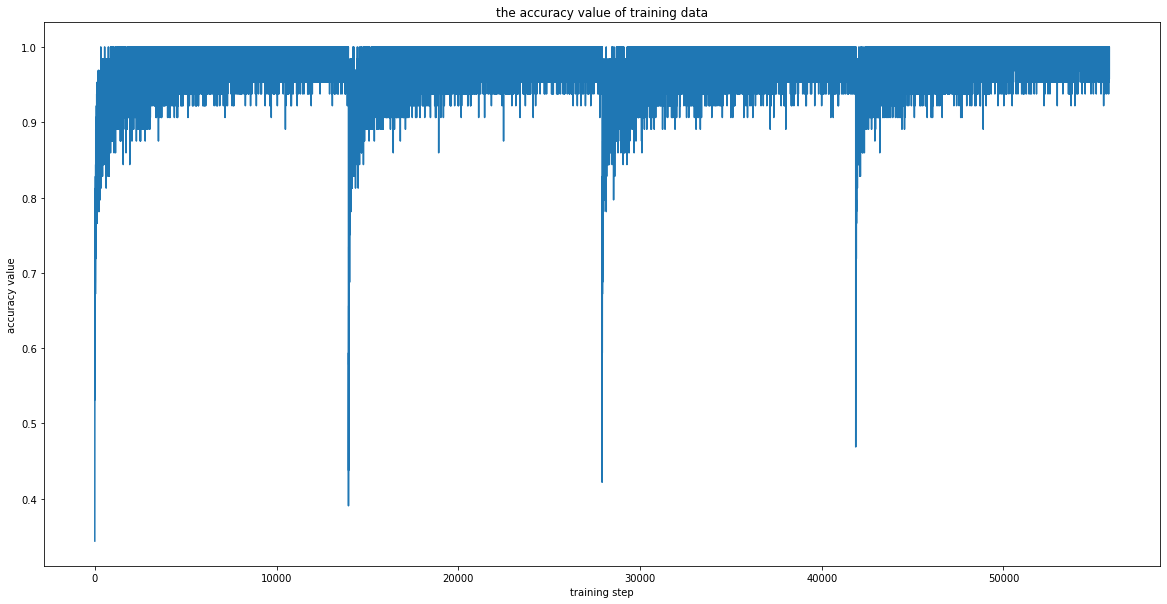

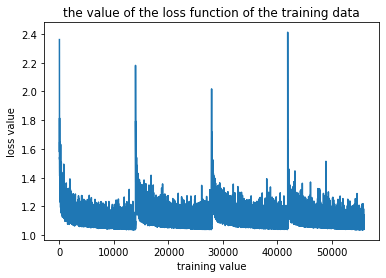

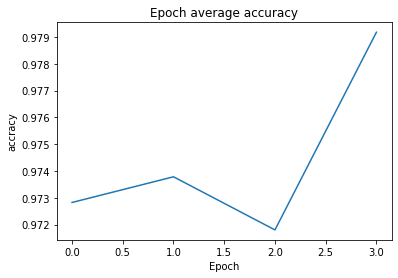

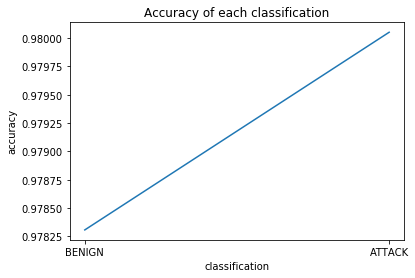

W1218 14:49:29.369540 140354176464704 queue_runner_impl.py:471] `tf.train.start_queue_runners()` was called when no queue runners were defined. You can safely remove the call to this deprecated function.


acc: [0.9900089285714285, 0.7639343084055055]
true_count 195913
223360
测试precision= 0.8771176575931232


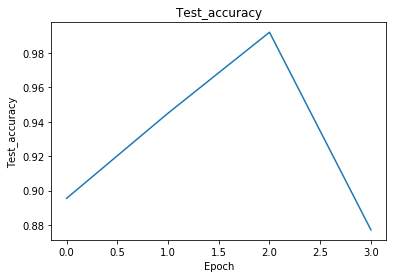

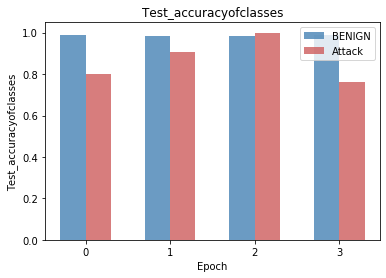

(893233,)
(223307,)
index: 0  loss_value: 1.77492  accuracy_value: 0.5
index: 1000  loss_value: 1.2487799  accuracy_value: 0.90625
index: 2000  loss_value: 1.0993845  accuracy_value: 1.0
index: 3000  loss_value: 1.133601  accuracy_value: 0.984375
index: 4000  loss_value: 1.0714866  accuracy_value: 1.0
index: 5000  loss_value: 1.0770738  accuracy_value: 1.0
index: 6000  loss_value: 1.1190989  accuracy_value: 0.96875
index: 7000  loss_value: 1.0674058  accuracy_value: 1.0
index: 8000  loss_value: 1.0721309  accuracy_value: 1.0
index: 9000  loss_value: 1.0774719  accuracy_value: 0.984375
index: 10000  loss_value: 1.0982026  accuracy_value: 0.984375
index: 11000  loss_value: 1.0653982  accuracy_value: 1.0
index: 12000  loss_value: 1.0638673  accuracy_value: 1.0
index: 13000  loss_value: 1.0397921  accuracy_value: 1.0
Accuracy of two classes： [0.9740982142857143, 0.9777419912719857]
Epoch_accracy: 0.97591484
Accuracy_value_Epo [0.9728257, 0.97378373, 0.97180176, 0.9791764, 0.97591484]


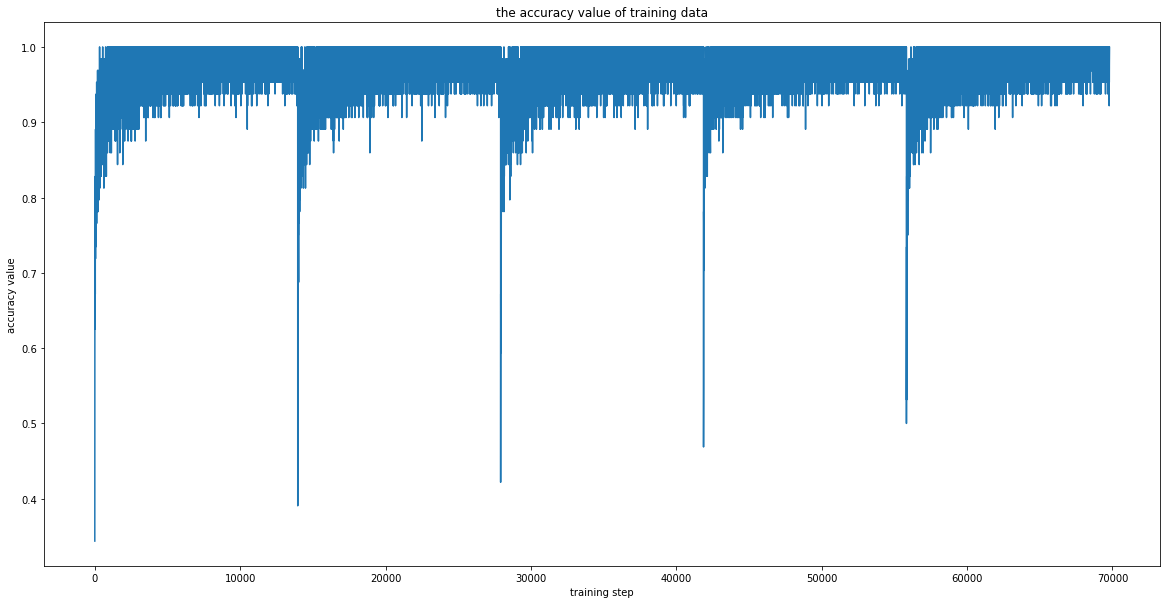

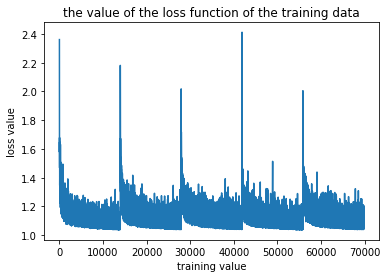

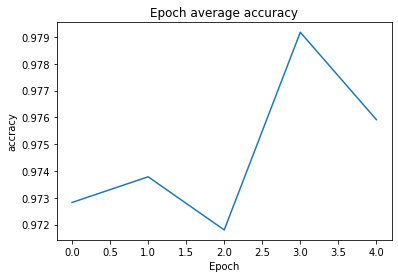

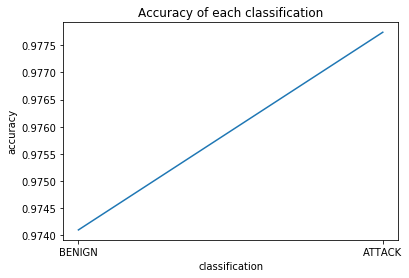

W1218 14:54:06.189804 140354176464704 queue_runner_impl.py:471] `tf.train.start_queue_runners()` was called when no queue runners were defined. You can safely remove the call to this deprecated function.


acc: [0.9870980990901704, 0.92778596327308]
true_count 213824
223360
测试precision= 0.9573065902578797


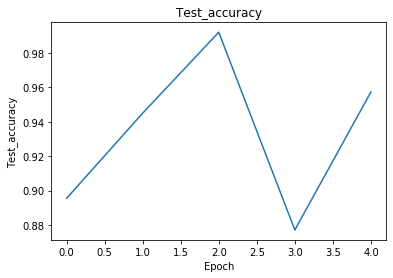

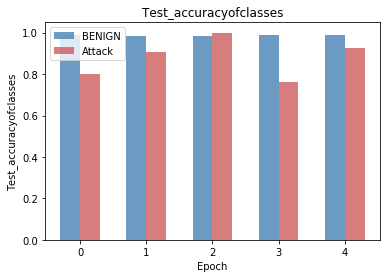

average_train_accracy is: 0.97591484
average_test_accracy is: 0.9333784025787967


In [10]:
if __name__ == '__main__':
    run_main()